<a href="https://colab.research.google.com/github/goswamiaman172/Internship/blob/main/Happiness_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

World Happiness Report Project

Project Description:

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


In [10]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Import essential models and functions from plotly
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Allows us to use Plotly offline
init_notebook_mode(connected=True)

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
dir_path='/content/drive/MyDrive/Project Internship Flip robo/Project3/Data/happiness_score_dataset.csv'

In [13]:
df = pd.read_csv(dir_path)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [15]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [16]:
df[df["Country"]=='India']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513


In [17]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [18]:
df.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [19]:
df.tail(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [22]:
GDP = df["Economy (GDP per Capita)"] #Finding the maximum GDP per capita
GDP.idxmax()

27

In [23]:
max_gdp = df.loc[28]
max_gdp

Country                                  France
Region                           Western Europe
Happiness Rank                               29
Happiness Score                           6.575
Standard Error                          0.03512
Economy (GDP per Capita)                1.27778
Family                                  1.26038
Health (Life Expectancy)                0.94579
Freedom                                 0.55011
Trust (Government Corruption)           0.20646
Generosity                              0.12332
Dystopia Residual                       2.21126
Name: 28, dtype: object

In [24]:
GDP.idxmin() #Finding the minimum GDP per capita

119

In [25]:
min_gdp = df.loc[111]
min_gdp

Country                                                     Iraq
Region                           Middle East and Northern Africa
Happiness Rank                                               112
Happiness Score                                            4.677
Standard Error                                           0.05232
Economy (GDP per Capita)                                 0.98549
Family                                                   0.81889
Health (Life Expectancy)                                 0.60237
Freedom                                                      0.0
Trust (Government Corruption)                            0.13788
Generosity                                               0.17922
Dystopia Residual                                        1.95335
Name: 111, dtype: object

In [31]:
social = df["Family"] #Finding maximum social support
social.idxmax()

1

In [32]:
max_social = df.loc[3]
max_social

Country                                  Norway
Region                           Western Europe
Happiness Rank                                4
Happiness Score                           7.522
Standard Error                           0.0388
Economy (GDP per Capita)                  1.459
Family                                  1.33095
Health (Life Expectancy)                0.88521
Freedom                                 0.66973
Trust (Government Corruption)           0.36503
Generosity                              0.34699
Dystopia Residual                       2.46531
Name: 3, dtype: object

In [33]:
social.idxmin()

147

In [34]:
min_social = df.loc[154]
min_social

Country                                       Benin
Region                           Sub-Saharan Africa
Happiness Rank                                  155
Happiness Score                                3.34
Standard Error                              0.03656
Economy (GDP per Capita)                    0.28665
Family                                      0.35386
Health (Life Expectancy)                     0.3191
Freedom                                      0.4845
Trust (Government Corruption)                0.0801
Generosity                                   0.1826
Dystopia Residual                           1.63328
Name: 154, dtype: object

In [36]:
healthy = df["Health (Life Expectancy)"] #Max life expectancy
healthy.idxmax()

23

In [37]:
max_healthy = df.loc[33]
max_healthy

Country                                   Thailand
Region                           Southeastern Asia
Happiness Rank                                  34
Happiness Score                              6.455
Standard Error                             0.03557
Economy (GDP per Capita)                    0.9669
Family                                     1.26504
Health (Life Expectancy)                    0.7385
Freedom                                    0.55664
Trust (Government Corruption)              0.03187
Generosity                                  0.5763
Dystopia Residual                          2.31945
Name: 33, dtype: object

In [38]:
healthy.idxmin() #Min life expectancy

122

In [39]:
min_healthy = df.loc[134]
min_healthy

Country                                                    Egypt
Region                           Middle East and Northern Africa
Happiness Rank                                               135
Happiness Score                                            4.194
Standard Error                                            0.0326
Economy (GDP per Capita)                                  0.8818
Family                                                     0.747
Health (Life Expectancy)                                 0.61712
Freedom                                                  0.17288
Trust (Government Corruption)                            0.06324
Generosity                                               0.11291
Dystopia Residual                                        1.59927
Name: 134, dtype: object

In [40]:
freedom = df["Freedom"] #Max freedom
freedom.idxmax()

3

In [41]:
max_freedom = df.loc[40]
max_freedom

Country                                  Trinidad and Tobago
Region                           Latin America and Caribbean
Happiness Rank                                            41
Happiness Score                                        6.168
Standard Error                                       0.10895
Economy (GDP per Capita)                             1.21183
Family                                               1.18354
Health (Life Expectancy)                             0.61483
Freedom                                              0.55884
Trust (Government Corruption)                         0.0114
Generosity                                           0.31844
Dystopia Residual                                    2.26882
Name: 40, dtype: object

In [42]:
freedom.idxmin()

111

In [43]:
min_freedom = df.loc[153]
min_freedom

Country                                      Rwanda
Region                           Sub-Saharan Africa
Happiness Rank                                  154
Happiness Score                               3.465
Standard Error                              0.03464
Economy (GDP per Capita)                    0.22208
Family                                       0.7737
Health (Life Expectancy)                    0.42864
Freedom                                     0.59201
Trust (Government Corruption)               0.55191
Generosity                                  0.22628
Dystopia Residual                           0.67042
Name: 153, dtype: object

In [44]:
gen = df["Generosity"] #Max generosity
gen.idxmax()

128

In [45]:
max_gen = df.loc[130]
max_gen

Country                                      Malawi
Region                           Sub-Saharan Africa
Happiness Rank                                  131
Happiness Score                               4.292
Standard Error                               0.0613
Economy (GDP per Capita)                    0.01604
Family                                      0.41134
Health (Life Expectancy)                    0.22562
Freedom                                     0.43054
Trust (Government Corruption)               0.06977
Generosity                                  0.33128
Dystopia Residual                           2.80791
Name: 130, dtype: object

In [46]:
gen.idxmin()

101

In [47]:
min_gen = df.loc[81]
min_gen

Country                                                   Jordan
Region                           Middle East and Northern Africa
Happiness Rank                                                82
Happiness Score                                            5.192
Standard Error                                           0.04524
Economy (GDP per Capita)                                 0.90198
Family                                                   1.05392
Health (Life Expectancy)                                 0.69639
Freedom                                                  0.40661
Trust (Government Corruption)                            0.14293
Generosity                                               0.11053
Dystopia Residual                                        1.87996
Name: 81, dtype: object

In [48]:
cor = df["Trust (Government Corruption)"] #Max corruption
cor.idxmax()

153

In [49]:
max_cor = df.loc[33]
max_cor

Country                                   Thailand
Region                           Southeastern Asia
Happiness Rank                                  34
Happiness Score                              6.455
Standard Error                             0.03557
Economy (GDP per Capita)                    0.9669
Family                                     1.26504
Health (Life Expectancy)                    0.7385
Freedom                                    0.55664
Trust (Government Corruption)              0.03187
Generosity                                  0.5763
Dystopia Residual                          2.31945
Name: 33, dtype: object

In [50]:
cor.idxmin() #Min corruption

73

In [51]:
min_cor = df.loc[70]
min_cor

Country                                   Mauritius
Region                           Sub-Saharan Africa
Happiness Rank                                   71
Happiness Score                               5.477
Standard Error                              0.07197
Economy (GDP per Capita)                    1.00761
Family                                      0.98521
Health (Life Expectancy)                     0.7095
Freedom                                     0.56066
Trust (Government Corruption)               0.07521
Generosity                                  0.37744
Dystopia Residual                           1.76145
Name: 70, dtype: object

In [52]:
cor = df.corr()
cor

<ipython-input-52-150a9db5d4b2>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


Text(0.5, 1.05, 'Correlation Heat Map for World Happiness')

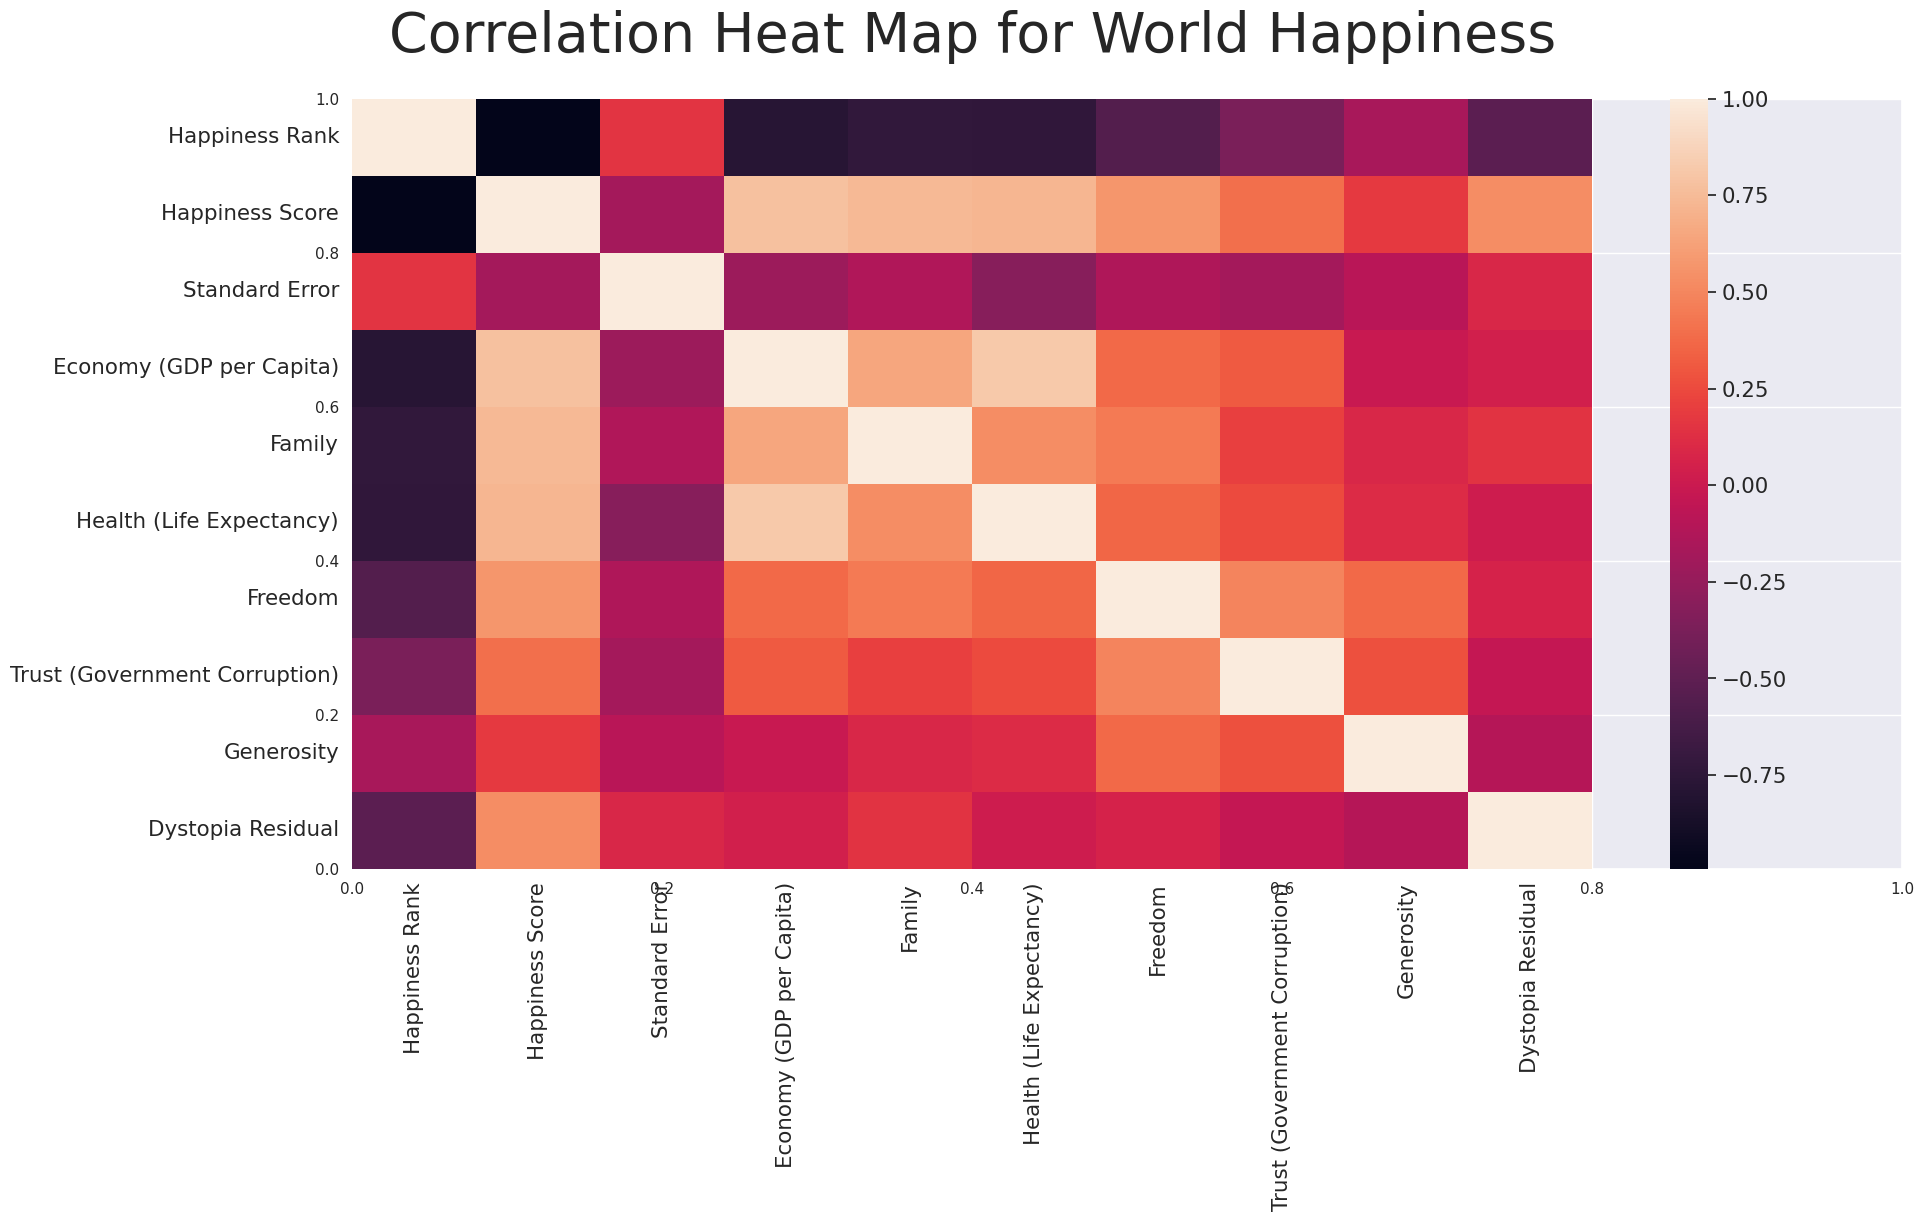

In [53]:
plt.subplots(figsize=(20,10))
sns.set(font_scale=1.4)
ax = plt.axes()
sns.heatmap(cor)
ax.set_title('Correlation Heat Map for World Happiness', fontsize=40, y=1.05)

In [54]:
pos = cor[cor > 0.75] #Displaying strong positive correlations
pos

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Happiness Score,NaN,1.000000,NaN,0.780966,NaN,NaN,NaN,NaN,NaN,NaN
Standard Error,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Economy (GDP per Capita),NaN,0.780966,NaN,1.000000,NaN,0.816478,NaN,NaN,NaN,NaN
Family,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Health (Life Expectancy),NaN,NaN,NaN,0.816478,NaN,1.000000,NaN,NaN,NaN,NaN
Freedom,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Trust (Government Corruption),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Generosity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Dystopia Residual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Text(0, 0.5, 'GDP Per Capita')

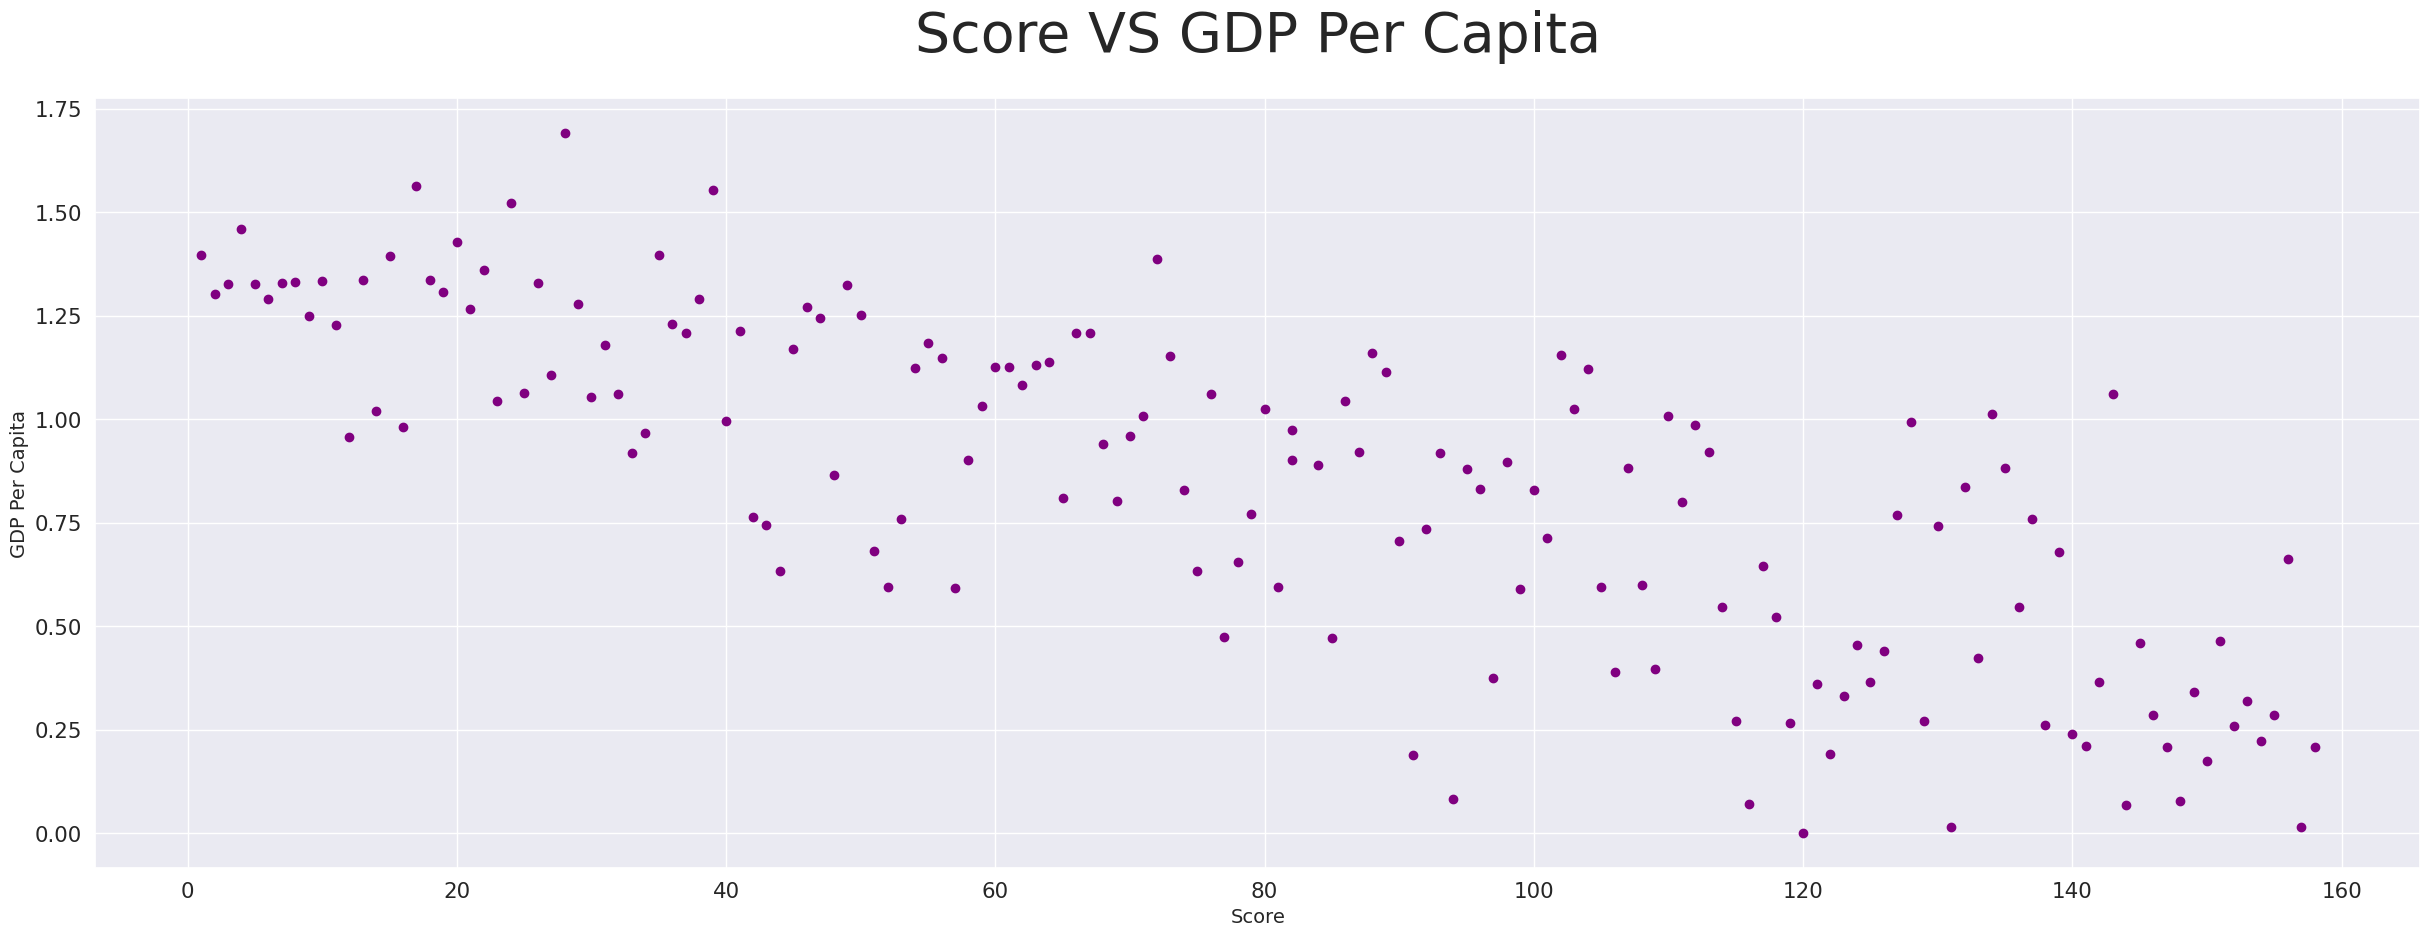

In [56]:
plt.figure( figsize=(30,10))
plt.scatter(df['Happiness Rank'], df['Economy (GDP per Capita)'], color='purple')
plt.title('Score VS GDP Per Capita', fontsize=40, y=1.05)
plt.xlabel('Score', fontsize=14)
plt.ylabel('GDP Per Capita', fontsize=14)

Text(0, 0.5, 'Social Support')

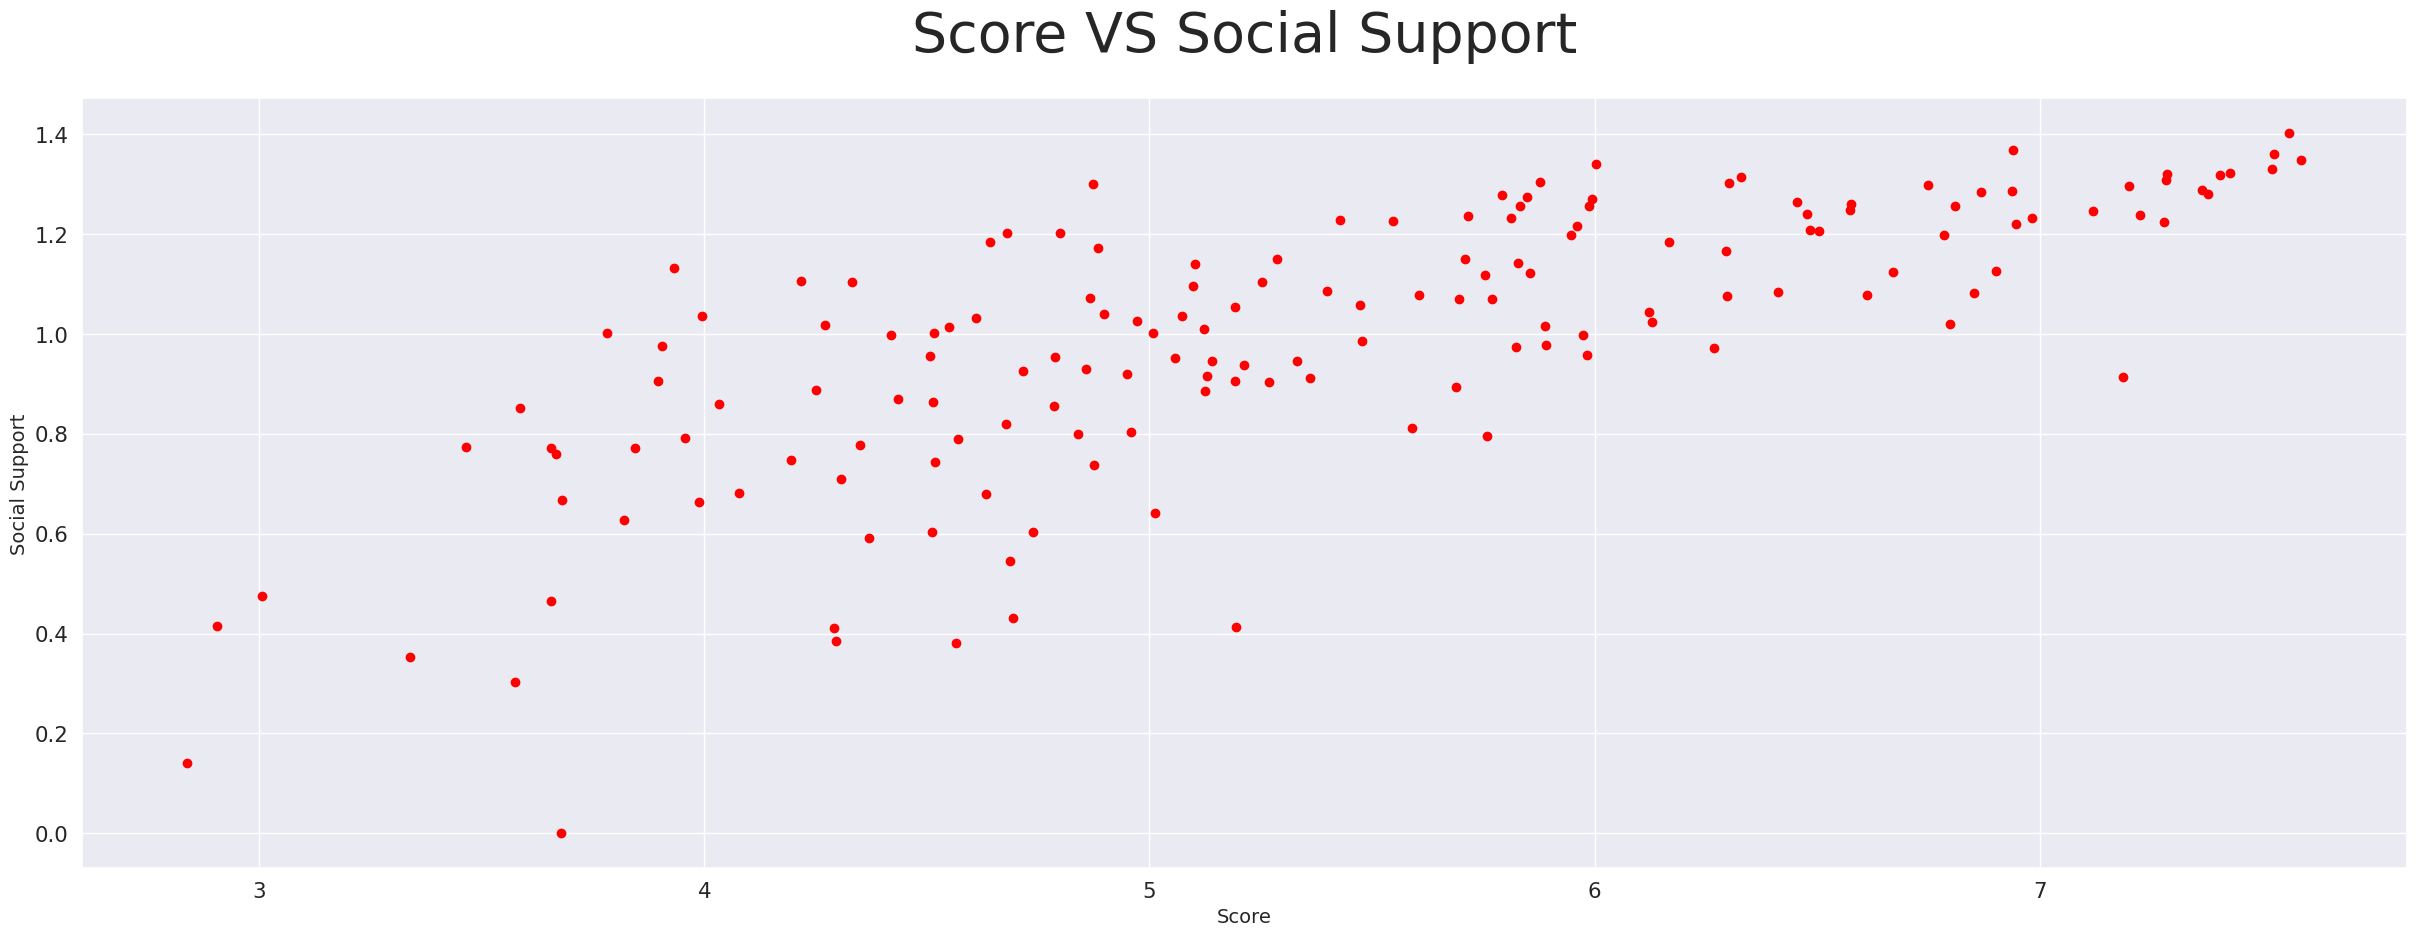

In [57]:
plt.figure( figsize=(30,10))
plt.scatter(df['Happiness Score'], df['Family'], color='red')
plt.title('Score VS Social Support', fontsize=40, y=1.05)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Social Support', fontsize=14)

Text(0, 0.5, 'Healthy Life Expectancy')

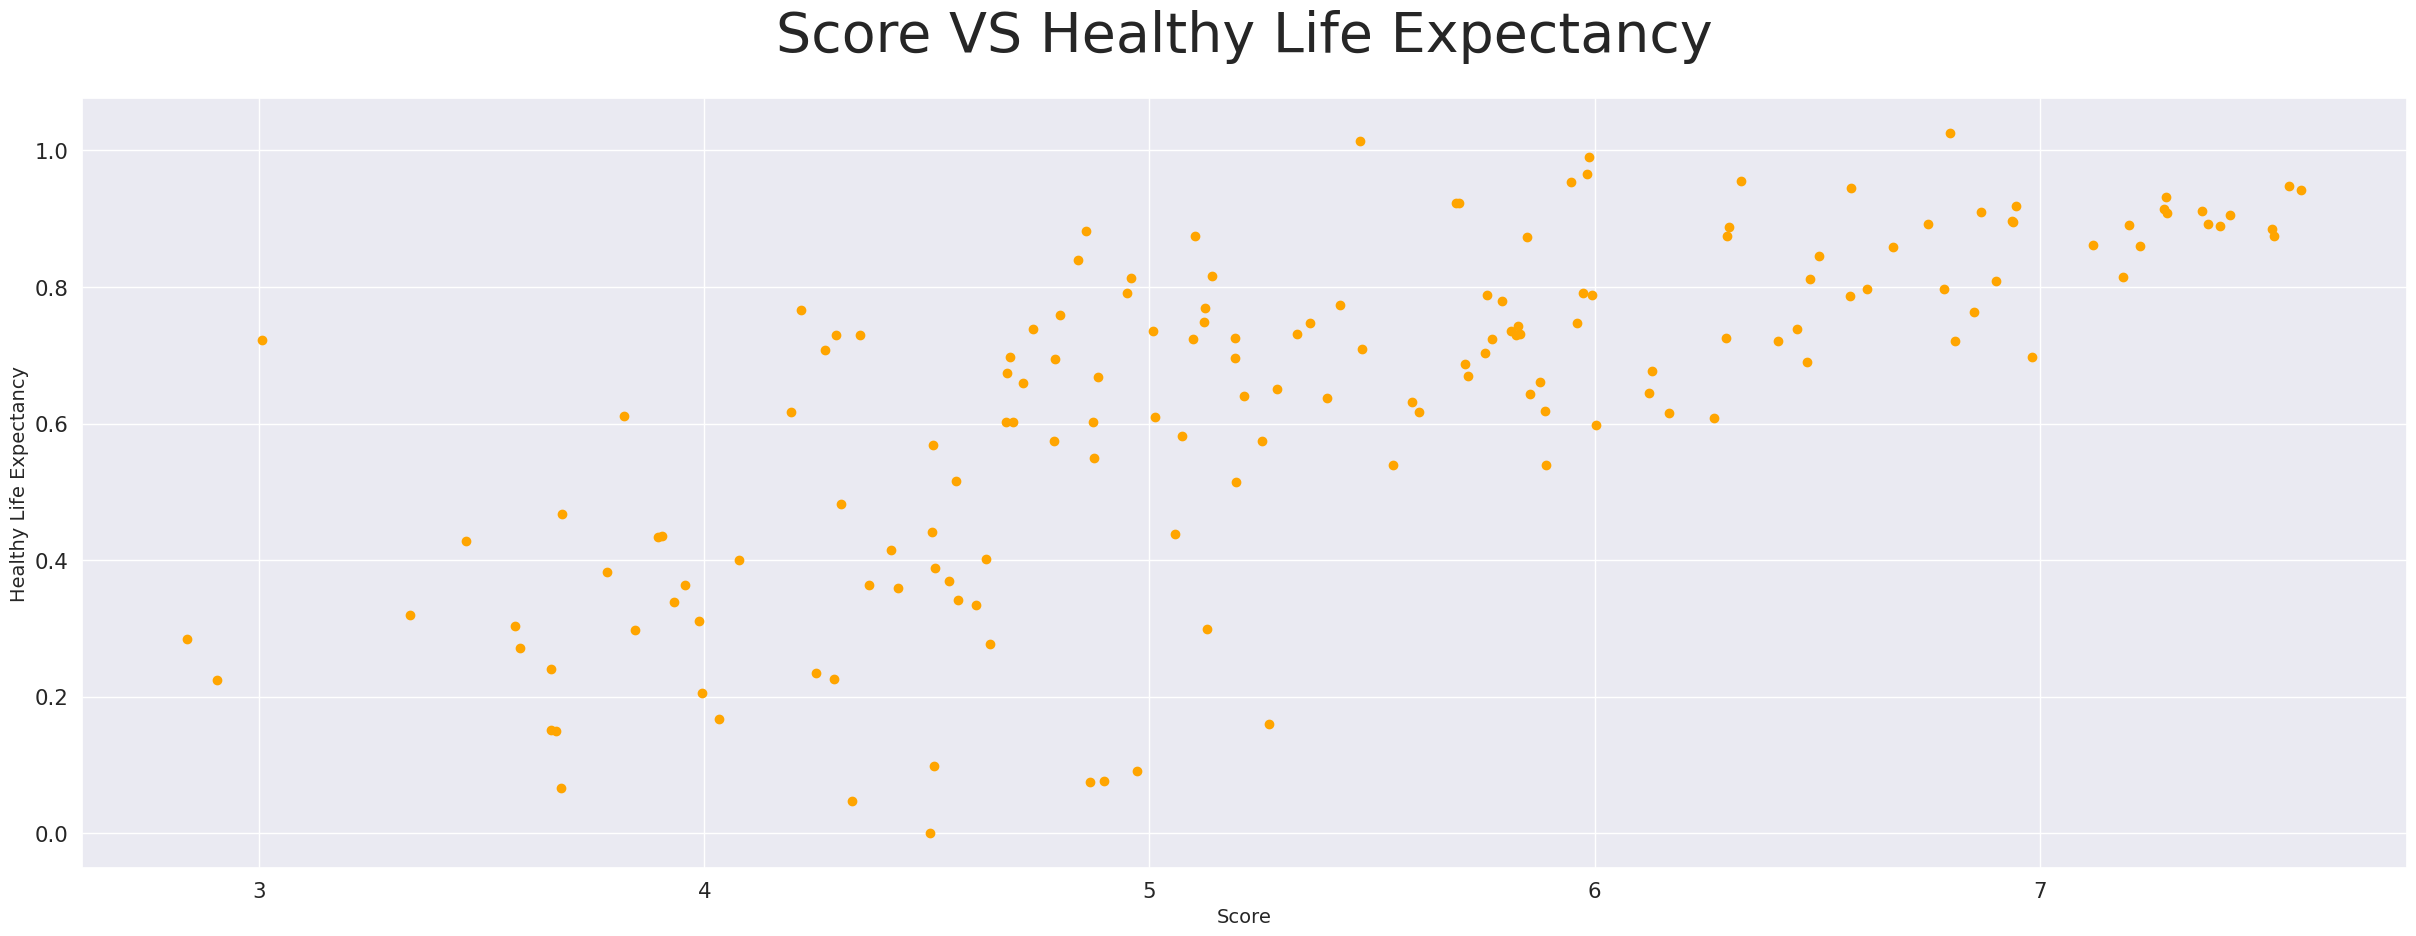

In [58]:
plt.figure( figsize=(30,10))
plt.scatter(df['Happiness Score'], df['Health (Life Expectancy)'], color='orange')
plt.title('Score VS Healthy Life Expectancy', fontsize=40, y=1.05)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Healthy Life Expectancy', fontsize=14)

In [61]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Define predictor and target variables
x = df[["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)"]]
y = df["Happiness Score"]

lm.fit(x, y)

yhat = lm.predict(x)

lm.intercept_

2.199125142436516

In [62]:
lm.coef_

array([0.88808859, 1.69694463, 1.17953681])

Here we obtain that the linear regression model is as follows:

yhat = 2.14 + 0.81(GDP per capita) + 1.32(Social support) + 1.30(Healthy life expectancy) to 2 d.p